# Virtual utility

## Case 1: LogNormal(mean,var)

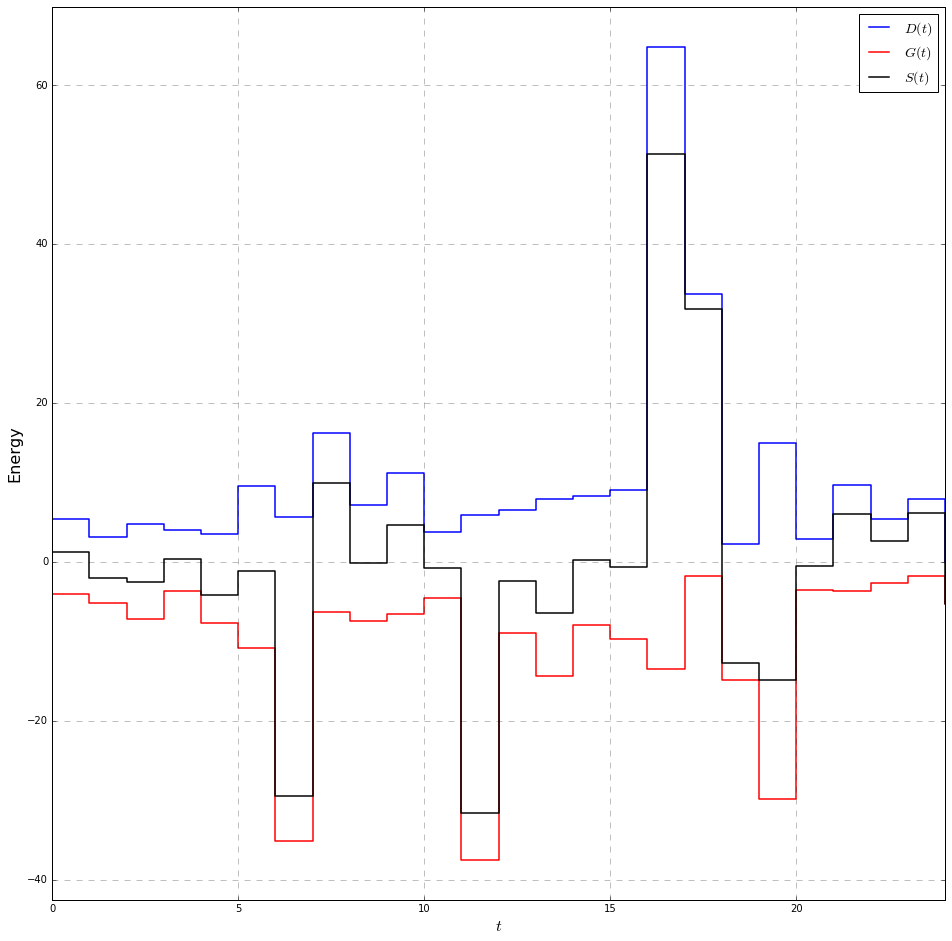

In [29]:
import numpy as np
from matplotlib import pyplot as plt

#Generation distribution
N_gen = np.random.lognormal(1.5,1,26)

#Consumption distribution
N_cons = np.zeros(26)
mu = [1,1,1,1,1,1,1,1.5,1.5,1.5,1.25,1.25,1.25,1.25,1.25,1.25,1.75,2.25,2.25,1.75,1.5,1,1,1,1]
var = [1,1,1,1,1,1,1,1.25,1.25,1,1,1,1,1,1,1,1.5,1.5,1.5,1.5,1.5,1,1,1,1]
for i in range(0, 25):
    N_cons[i] = np.random.lognormal(mu[i]*1.5,0.5*var[i])
    
#Surplus and deficit
S=N_cons - N_gen
    
#Plot them all   
y = list(range(0, 26)) 
plt.figure(figsize=(16,16), dpi=1200)
plt.xlabel('$t$', fontsize=16)
plt.ylabel('Energy', fontsize=16)
plt.step(y,N_cons,'b', linewidth=1.5, label = "$D(t)$")
plt.step(y,- N_gen,'r', linewidth=1.5, label = "$G(t)$")  
plt.step(y,S,'k', linewidth=1.5, label = "$S(t)$")  
plt.axis([0,24,-max(N_gen)-5,max(N_cons)+5])
plt.grid(color='k', alpha=0.5, linestyle='dashed', linewidth=0.5)
plt.legend( loc=1, fontsize=14)
plt.show()

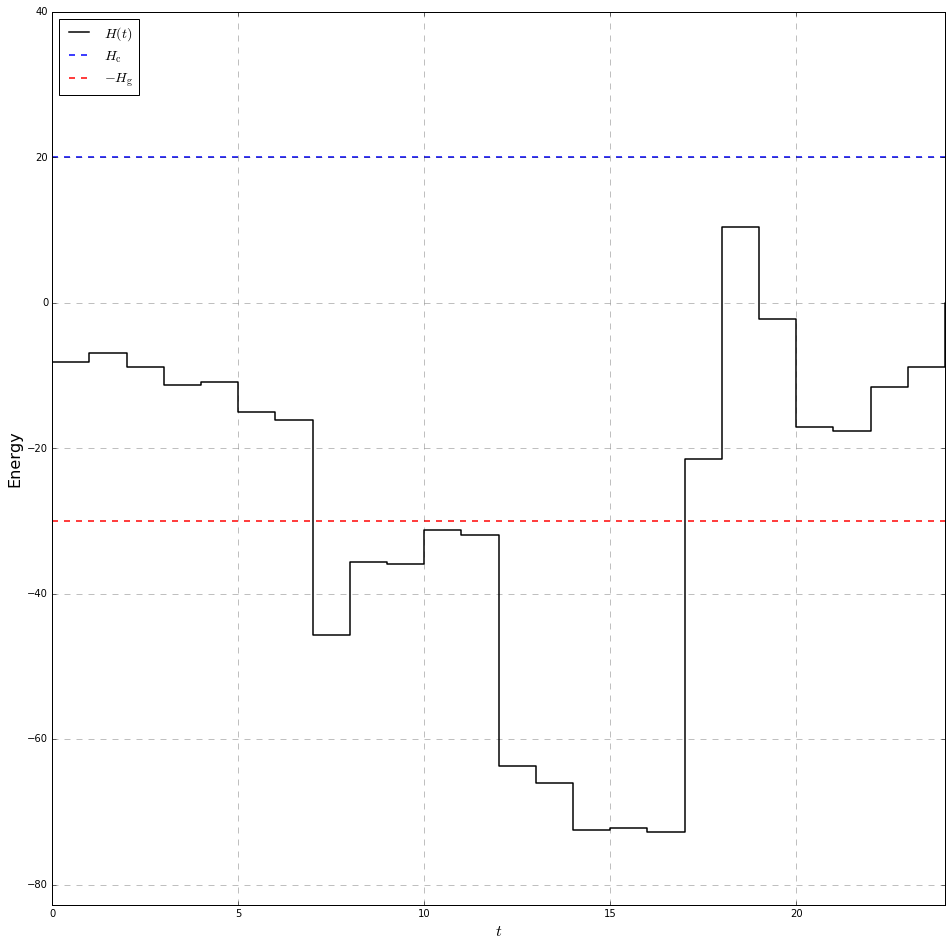

In [34]:
#Storage or generation
H = np.zeros(26)
for i in range(1, 25):
    H[i] = H[i-1] + S[i-1]
H_c=20
H_g=30
#Plot incuding max and min
plt.figure(figsize=(16,16), dpi=1200)
plt.xlabel('$t$', fontsize=16)
plt.ylabel('Energy', fontsize=16)
plt.step(y,H,'k', linewidth=1.5, label = "$H(t)$")
plt.plot([0,25],[H_c,H_c],'b--', linewidth=1.5,label = "$H_\mathrm{c}$") 
plt.plot([0,25],[-H_g,-H_g],'r--', linewidth=1.5,label = "$- H_\mathrm{g}$") 
plt.axis([0,24,min(min(H)-10,-H_g-10),max(max(H)+10,H_g+10)])
plt.grid(color='k', alpha=0.5, linestyle='dashed', linewidth=0.5)
plt.legend( loc=2, fontsize=14)
plt.show()

**Question:** What is the probability that (a) $H(t) > H_\mathrm{c}$ and (b) $H(t) < - H_\mathrm{g}$?